# DATA ANALYSIS AND DATASCIENCE USING PYTHON
 ## TASK- 3

 # Task 3: Clustering Analysis– Customer Segmentation

In [4]:
# import all libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 

###  Tasks to Perform

In [5]:
dataframe = pd.read_csv("Customer_data.csv")

In [21]:
dataframe

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,35000,81
2,3,Female,20,86000,6
3,4,Female,23,59000,77
4,5,Female,31,38000,40
...,...,...,...,...,...
1995,1996,Female,71,184387,40
1996,1997,Female,91,73158,32
1997,1998,Male,87,90961,14
1998,1999,Male,77,182109,4


In [29]:
dataframe.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,35000,81
2,3,Female,20,86000,6
3,4,Female,23,59000,77
4,5,Female,31,38000,40


In [30]:
dataframe.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
1995,1996,Female,71,184387,40
1996,1997,Female,91,73158,32
1997,1998,Male,87,90961,14
1998,1999,Male,77,182109,4
1999,2000,Male,90,110610,52


In [31]:
print('Shape of Dataset : ')
dataframe.shape

Shape of Dataset : 


(2000, 5)

In [32]:
dataframe.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100)
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500
std,577.494589,28.429747,45739.536688,27.934661
min,1.000000,0.000000,0.000000,0.000000
25%,500.750000,25.000000,74572.000000,28.000000
50%,1000.500000,48.000000,110045.000000,50.000000
75%,1500.250000,73.000000,149092.750000,75.000000
max,2000.000000,99.000000,189974.000000,100.000000


In [33]:
dataframe.isnull()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [34]:
dataframe.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
dtype: int64

In [35]:
dataframe.info

<bound method DataFrame.info of       CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)
0              1    Male   19              15000                      39
1              2    Male   21              35000                      81
2              3  Female   20              86000                       6
3              4  Female   23              59000                      77
4              5  Female   31              38000                      40
...          ...     ...  ...                ...                     ...
1995        1996  Female   71             184387                      40
1996        1997  Female   91              73158                      32
1997        1998    Male   87              90961                      14
1998        1999    Male   77             182109                       4
1999        2000    Male   90             110610                      52

[2000 rows x 5 columns]>

In [36]:
dataframe.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
dtype: object

In [37]:
print('Number of duplicate rows :')
dataframe.duplicated().sum()

Number of duplicate rows :


np.int64(0)

In [38]:
dataframe.drop_duplicates()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,35000,81
2,3,Female,20,86000,6
3,4,Female,23,59000,77
4,5,Female,31,38000,40
...,...,...,...,...,...
1995,1996,Female,71,184387,40
1996,1997,Female,91,73158,32
1997,1998,Male,87,90961,14
1998,1999,Male,77,182109,4


In [42]:
dataframe.dropna()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,35000,81
2,3,Female,20,86000,6
3,4,Female,23,59000,77
4,5,Female,31,38000,40
...,...,...,...,...,...
1995,1996,Female,71,184387,40
1996,1997,Female,91,73158,32
1997,1998,Male,87,90961,14
1998,1999,Male,77,182109,4


## Data Preprocessing

In [5]:
# Standardize the data

# Gender Encoding

dataframe['Gender'] = LabelEncoder().fit_transform(dataframe['Gender'])
dataframe.corr()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
CustomerID,1.000000,0.004520,0.070700,0.328400,0.018936
Gender,0.004520,1.000000,0.005821,0.004701,-0.000528
Age,0.070700,0.005821,1.000000,0.021378,-0.041798
Annual Income ($),0.328400,0.004701,0.021378,1.000000,0.023299
Spending Score (1-100),0.018936,-0.000528,-0.041798,0.023299,1.000000


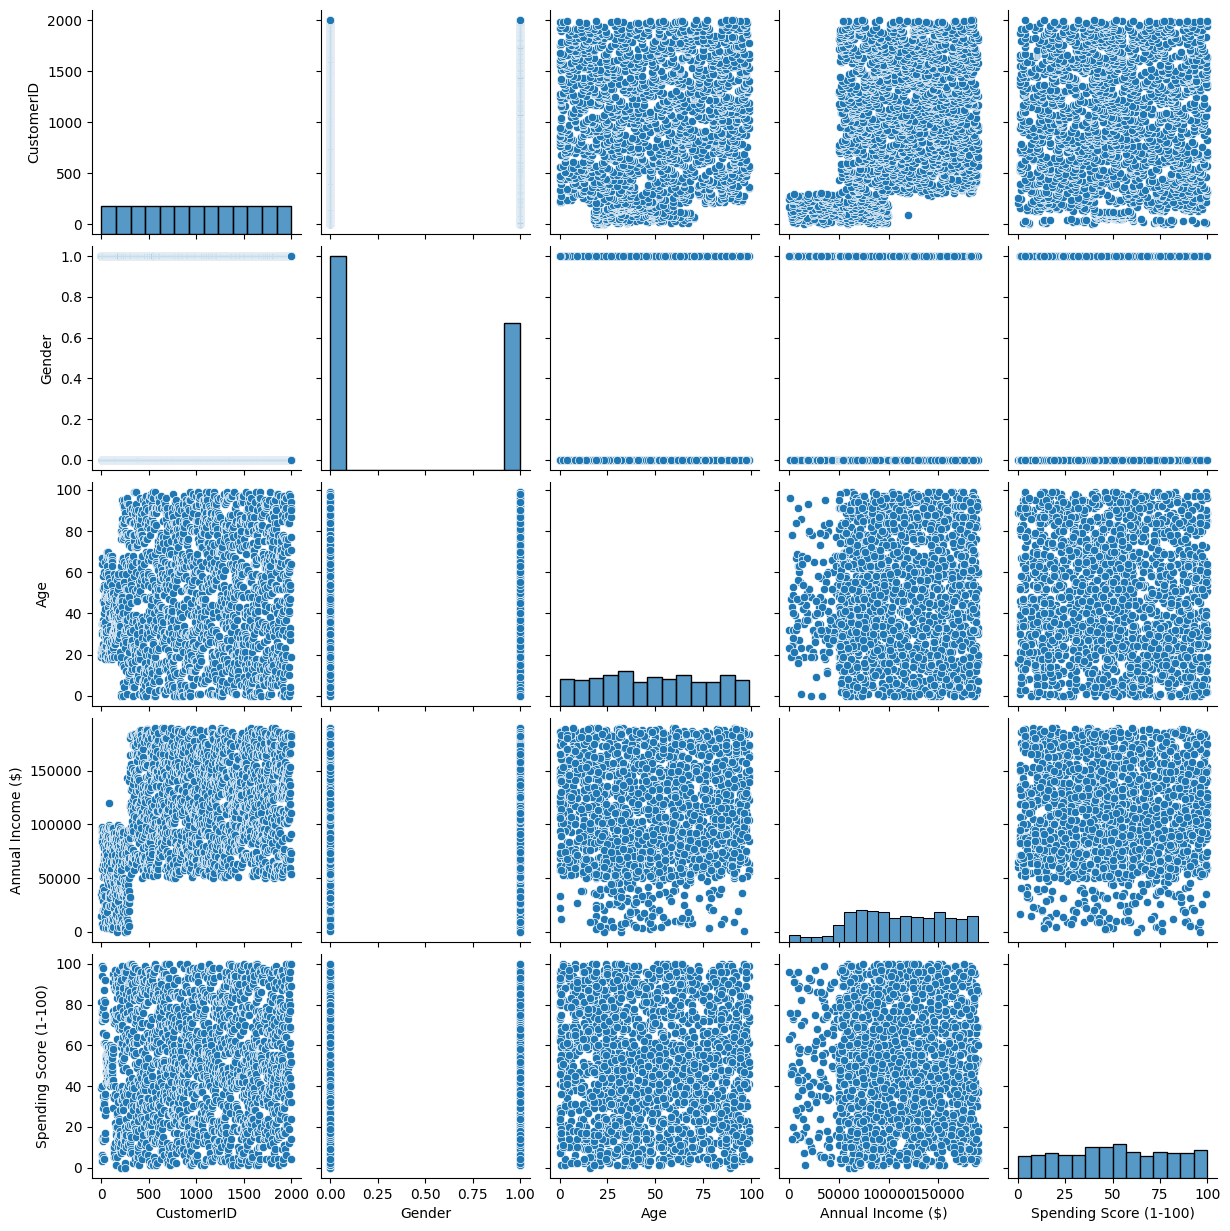

In [9]:
sns.pairplot(dataframe)

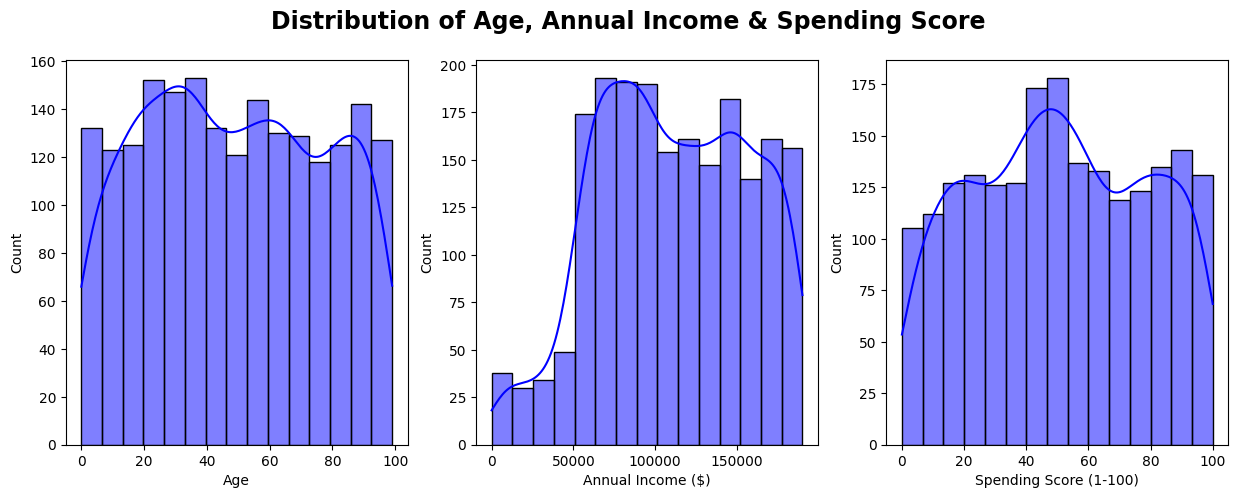

In [12]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=dataframe, x=col, bins=15, kde=True, color='blue')
    plt.xlabel(col)

plt.suptitle('Distribution of Age, Annual Income & Spending Score', fontsize=17, fontweight = 'bold', ha='center')
plt.subplots_adjust(wspace=0.2)

# Display
plt.show()

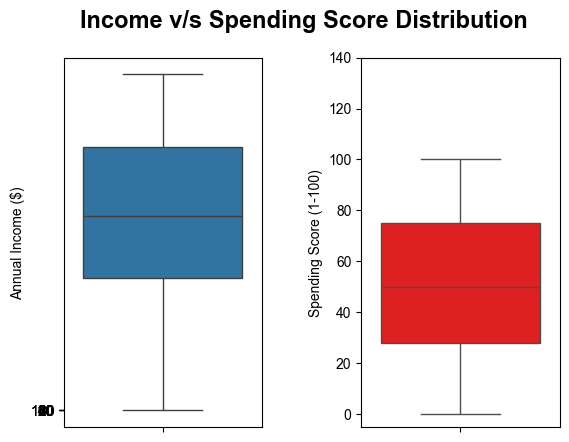

In [14]:
### Income v/s Spending

plt.subplot(1, 2, 1)
sns.boxplot(y=dataframe["Annual Income ($)"])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140]) 
plt.subplot(1, 2, 2)
sns.boxplot(y=dataframe["Spending Score (1-100)"], color='red')
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140]) 


plt.suptitle('Income v/s Spending Score Distribution', fontsize=17, fontweight='bold', x=0.5)
plt.subplots_adjust(wspace=0.5)
sns.set_style('dark')

plt.show() 

In [60]:
# MinMaxScaler Technique to scale the features

# Normalise data 
num_cols = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']
dataframe[num_cols] = MinMaxScaler().fit_transform(dataframe[num_cols])
dataframe.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,1,0.191919,0.078958,0.39
1,2,1,0.212121,0.184236,0.81
2,3,0,0.202020,0.452694,0.06
3,4,0,0.232323,0.310569,0.77
4,5,0,0.313131,0.200027,0.40


In [19]:
# Confirming that all values are in range 0 to 1

print('\nMinimun value of normalized data :\n ' , dataframe[num_cols].min())
print('\nMaximum value of normalized data :\n ' , dataframe[num_cols].max())


Minimun value of normalized data :
  Age                       0.0
Annual Income ($)         0.0
Spending Score (1-100)    0.0
dtype: float64

Maximum value of normalized data :
  Age                       1.0
Annual Income ($)         1.0
Spending Score (1-100)    1.0
dtype: float64


## Clustering

### Determine the optimal number of clusters:

In [21]:
# Determining the optimal number of clusters using the Elbow Method (within-cluster sum of squares (WCSS))

wcss_values = []
k_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(dataframe[['Age', 'Annual Income ($)', 'Spending Score (1-100)']])
    wcss_values.append(kmeans.inertia_)
    k_values.append(k)

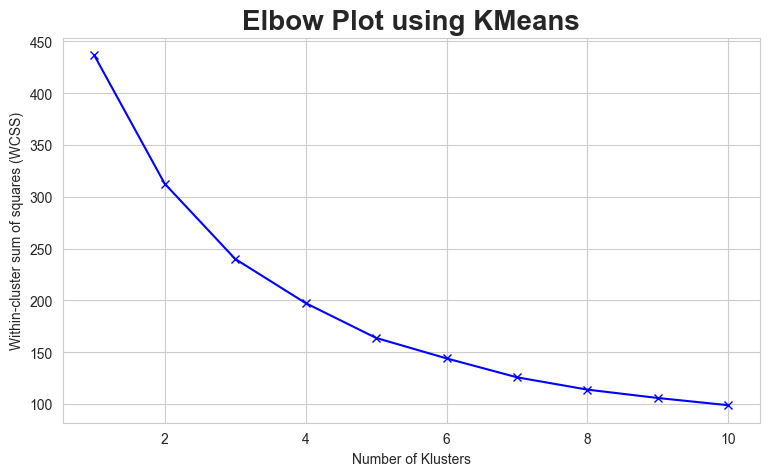

In [51]:
# Plot the Within-Cluster Sum of Squares (WCSS) against the number of clusters.
#  Plot Elbow plot
plt.figure(figsize=(9, 5))

plt.plot(k_values, wcss_values, 'bx-')
plt.xlabel('Number of Klusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Plot using KMeans', fontsize=20, fontweight='bold')
plt.show()

In [24]:
# Create k-means object - 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit k-means object to the data
kmeans.fit(dataframe[['Age', 'Annual Income ($)', 'Spending Score (1-100)']])

# Add cluster labels to original df
dataframe['Cluster'] = kmeans.labels_

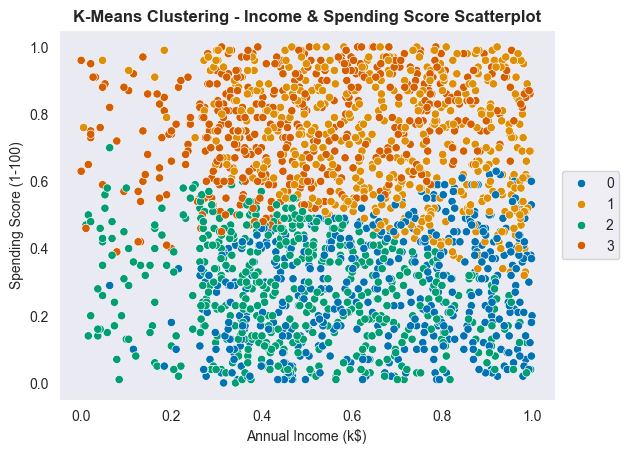

In [26]:
# Plot clusters

sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=dataframe, hue='Cluster', palette='colorblind')

plt.title('K-Means Clustering - Income & Spending Score Scatterplot', fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.set_style('darkgrid')

plt.show()

In [52]:
#Centroid Visuals: Show the centroid of each cluster for better interpretation.
# Centroids (centre points) of each of the 4 clusters
centroids = kmeans.cluster_centers_
print(centroids)

[[0.24520202 0.66676622 0.28666667]
 [0.74658869 0.68483433 0.71169591]
 [0.7089791  0.47821711 0.27921756]
 [0.24200598 0.50477036 0.76654244]]


C:\Users\Snehal Kamble\AppData\Local\Temp\ipykernel_3624\1538149953.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_cmap = plt.cm.get_cmap('viridis', 4)


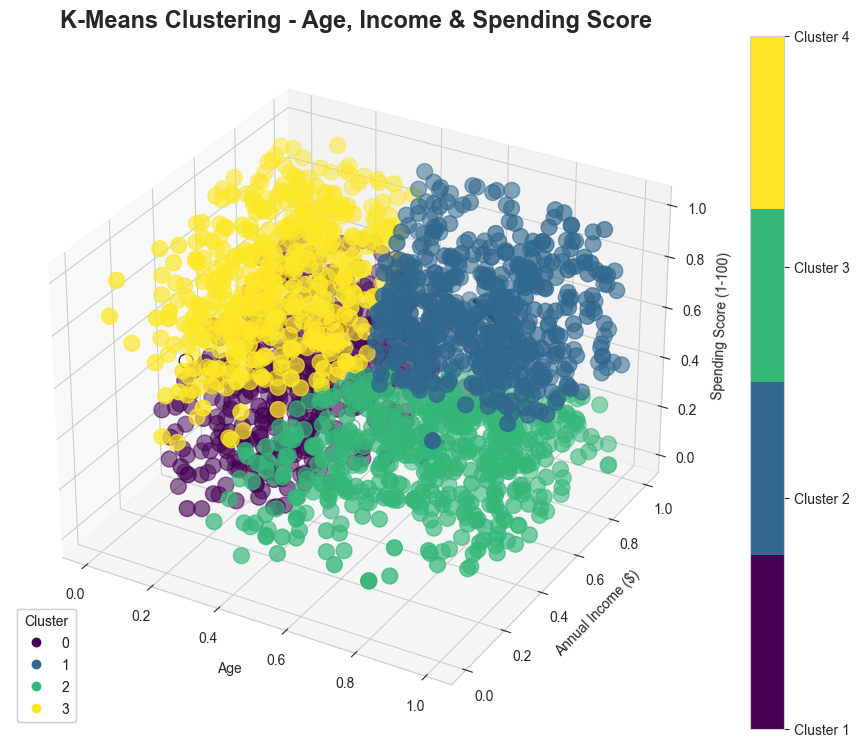

In [29]:
# Plot 3D clusters

sns.set_style('whitegrid')
fig = plt.figure(figsize=(12, 9))

# Create custom colormap 
my_cmap = plt.cm.get_cmap('viridis', 4)

# Create 3D scatter plot 
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(dataframe['Age'], dataframe['Annual Income ($)'], data, c=dataframe['Cluster'], s=130, 
                     cmap=my_cmap)

# Add legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend1)

# Set the colorbar to show cluster labels
cbar = plt.colorbar(scatter)
cbar.set_ticks(np.arange(0, 4))
cbar.set_ticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

# Set axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income ($)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('K-Means Clustering - Age, Income & Spending Score', fontsize=17, fontweight='bold')

# Plot centroids
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=300, linewidths=3, color='black', zorder=10)

# Coordinates of centroids of cluster
x = [0.14304993, 0.41093117, 0.28605769, 0.69201183]
y = [0.20491803, 0.58606557, 0.58278689, 0.26809584]
z = [0.60508414, 0.1895811, 0.82168367, 0.39764521]

# Highlight centroids with different color and size
ax.scatter(
    x,
    y,
    z,
    color='white',
    s=100,  # Marker size
    label='Highlighted Points',
    edgecolors='black'
)
# Display
plt.show()

In [59]:
#Summarystatistics to understand ranges of values.
import pandas as pd

# Load the dataset


# Display basic summary statistics
summary_stats = dataframe.describe()

print(summary_stats)


        CustomerID       Gender          Age  Annual Income ($)  \
count  2000.000000  2000.000000  2000.000000        2000.000000   
mean   1000.500000     0.407000    48.960000      110731.821500   
std     577.494589     0.491398    28.429747       45739.536688   
min       1.000000     0.000000     0.000000           0.000000   
25%     500.750000     0.000000    25.000000       74572.000000   
50%    1000.500000     0.000000    48.000000      110045.000000   
75%    1500.250000     1.000000    73.000000      149092.750000   
max    2000.000000     1.000000    99.000000      189974.000000   

       Spending Score (1-100)  
count             2000.000000  
mean                50.962500  
std                 27.934661  
min                  0.000000  
25%                 28.000000  
50%                 50.000000  
75%                 75.000000  
max                100.000000  


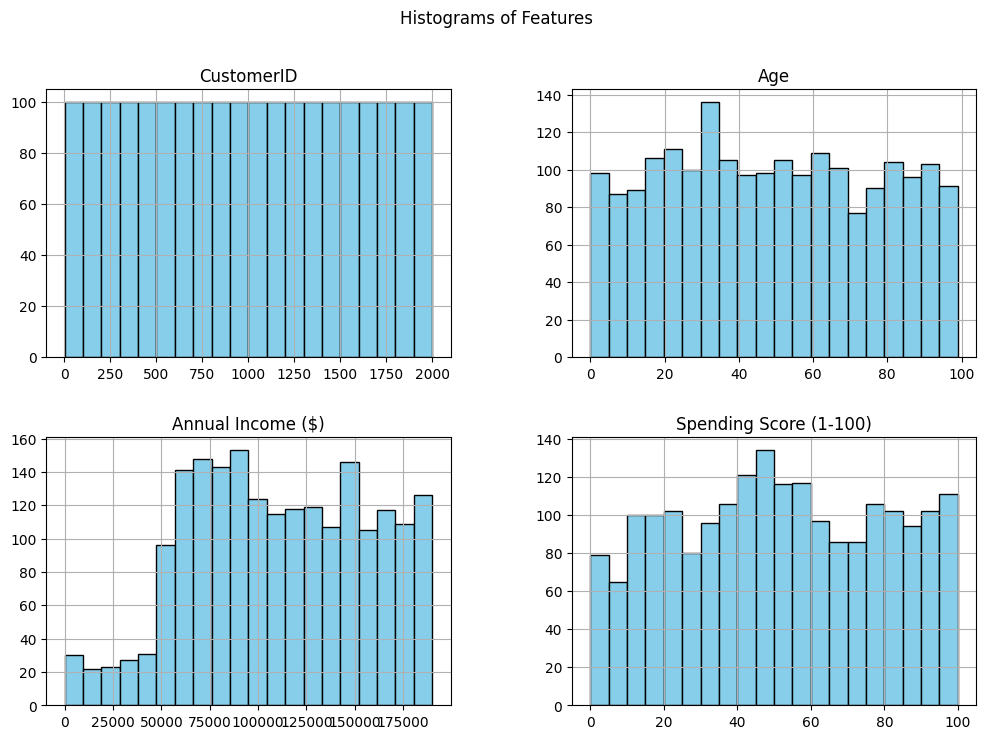

In [48]:
import matplotlib.pyplot as plt

dataframe.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()


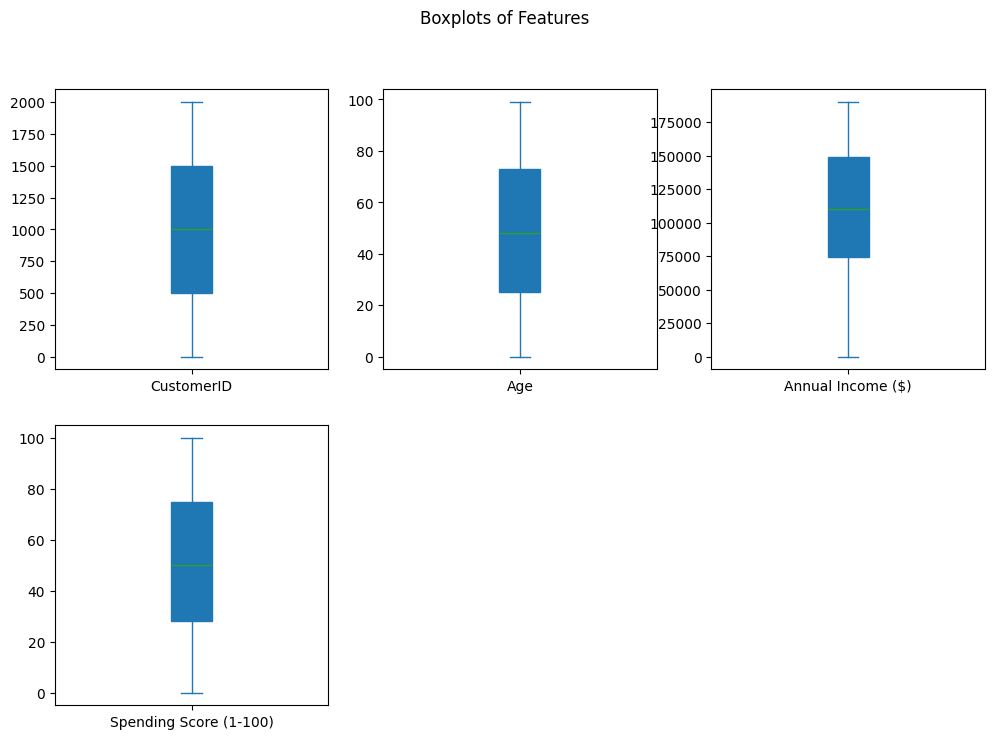

In [49]:
dataframe.plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8), patch_artist=True)
plt.suptitle('Boxplots of Features')
plt.show()


## Visualization
 ## ● Create visualizations to represent the clusters

In [58]:
 #2DScatter Plot:
 #■ UsePCA(Principal Component Analysis) to reduce dimensions to two for visualization
from sklearn.preprocessing import LabelEncoder

# Example: Encode 'Gender' column
label_encoder = LabelEncoder()
dataframe['Gender'] = label_encoder.fit_transform(dataframe['Gender'])

# 'Male' -> 1, 'Female' -> 0 (depends on dataset)


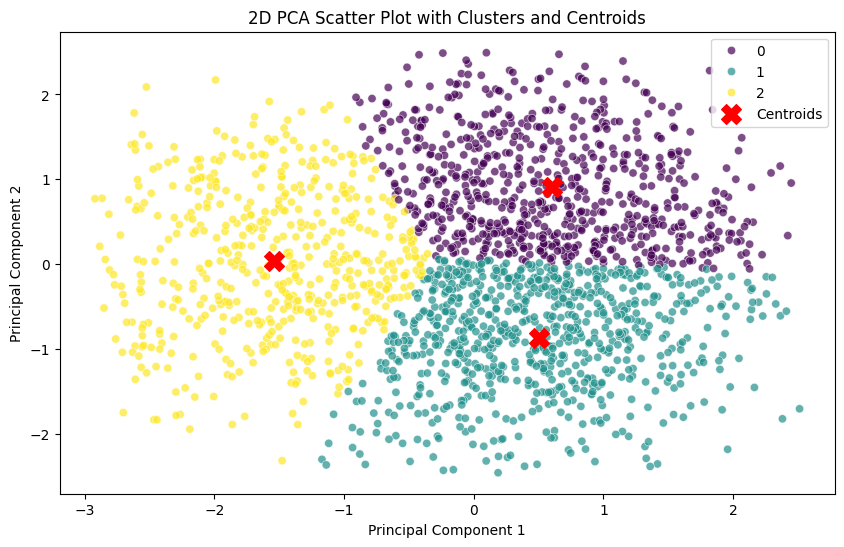

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Load dataset
data = pd.read_csv('customer_data.csv')

# Identify and encode categorical columns
for col in data.select_dtypes(include='object').columns:
    if data[col].nunique() == 2:
        # Label encode binary columns
        data[col] = LabelEncoder().fit_transform(data[col])
    else:
        # One-hot encode columns with more than 2 categories
        data = pd.get_dummies(data, columns=[col], drop_first=True)

# Preprocess: Handle missing values and standardize the data
data = data.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)
centroids = kmeans.cluster_centers_

# Create DataFrame for visualization
pca_df = pd.DataFrame({
    'PCA1': pca_result[:, 0],
    'PCA2': pca_result[:, 1],
    'Cluster': clusters
})

# 2D Scatter Plot with PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('2D PCA Scatter Plot with Clusters and Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
